# WEATHER DATASET ANALYSIS

This data comes from a weather station located in San Diego, California. The weather station is equipped
with sensors that capture weather-related measurements such as air temperature, air pressure, and relative
humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure
that sufficient data for different seasons and weather conditions is captured.

# Dataset Description
• rowID - unique number for each row (Unit: NA) <br>
• hpwrentimestamp - timestamp of measure (Unit: year-month-day hour:minute:second)<br>
• air pressure - air pressure measured at the timestamp (Unit: hectopascals)<br>
• air temp - air temperature measure at the timestamp (Unit: degrees Fahrenheit)<br>
• avg wind direction - wind direction averaged over the minute before the timestamp (Unit: degrees, with 0 means coming from     the North, and increasing clockwise)<br>
• avg wind speed - wind speed averaged over the minute before the timestamp (Unit: meters per second)<br>
• max wind direction - highest wind direction in the minute before the timestamp (Unit: degrees, with 0 being North and           increasing clockwise)<br>
• max wind speed - highest wind speed in the minute before the timestamp (Unit: meters per second)<br>
• min wind direction - smallest wind direction in the minute before the timestamp (Unit: degrees, with 0 being North and         inceasing clockwise)<br>
• min wind speed - smallest wind speed in the minute before the timestamp (Unit: meters per second)<br>
• rain accumulation - amount of accumulated rain measured at the timestamp (Unit: millimeters)<br>
• rain duration - length of time rain has fallen as measured at the timestamp (Unit: seconds)<br>
• relative humidity - relative humidity measured at the timestamp (Unit: percent)<br>


## Importing the Dependencies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading Data

In [2]:
data=pd.read_csv("Downloads/datamining.csv")
data

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,10-09-2011 00:00,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,10-09-2011 00:01,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,10-09-2011 00:02,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,10-09-2011 00:03,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,10-09-2011 00:04,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,16-08-2013 04:48,916.6,78.62,195.0,1.0,196.0,1.1,194.0,0.9,0.0,0.0,9.1
1048571,1048571,16-08-2013 04:49,916.6,78.62,192.0,0.9,193.0,0.9,192.0,0.8,0.0,0.0,8.8
1048572,1048572,16-08-2013 04:50,916.6,78.62,186.0,0.7,186.0,0.8,186.0,0.6,0.0,0.0,8.6
1048573,1048573,16-08-2013 04:51,916.6,78.62,176.0,0.6,178.0,0.7,175.0,0.5,0.0,0.0,7.1


In [3]:
data.shape

(1048575, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   rowID               1048575 non-null  int64  
 1   hpwren_timestamp    1048575 non-null  object 
 2   air_pressure        1048575 non-null  float64
 3   air_temp            1048575 non-null  float64
 4   avg_wind_direction  1048341 non-null  float64
 5   avg_wind_speed      1048341 non-null  float64
 6   max_wind_direction  1048341 non-null  float64
 7   max_wind_speed      1048341 non-null  float64
 8   min_wind_direction  1048341 non-null  float64
 9   min_wind_speed      1048341 non-null  float64
 10  rain_accumulation   1048574 non-null  float64
 11  rain_duration       1048574 non-null  float64
 12  relative_humidity   1048575 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 104.0+ MB


### Data Cleaning

###### Checking for Missing Values

In [5]:
data.isnull().sum()

rowID                   0
hpwren_timestamp        0
air_pressure            0
air_temp                0
avg_wind_direction    234
avg_wind_speed        234
max_wind_direction    234
max_wind_speed        234
min_wind_direction    234
min_wind_speed        234
rain_accumulation       1
rain_duration           1
relative_humidity       0
dtype: int64

**Finding** <br>
There are 234 missing values in some columns.

In [6]:
from matplotlib import pyplot as plt

#### Dropping some irrelevant columns

In [7]:
data.drop(columns = 'rowID',inplace = True)
data.drop(columns = 'hpwren_timestamp',inplace = True)
data.drop(columns = 'rain_accumulation',inplace = True)
data.drop(columns = 'rain_duration',inplace = True)
data.shape

(1048575, 9)

In [8]:
data.head(5)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,60.5
1,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,39.9
2,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,43.0
3,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,49.5
4,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,58.8


In [9]:
columns=['air_pressure','air_temp','avg_wind_direction','avg_wind_speed','max_wind_direction','max_wind_speed','min_wind_direction','min_wind_speed','relative_humidity']

#### Dropping all the rows containing missing values 

In [10]:
data = data.dropna(axis = 0, how ='any')

In [11]:
data.isnull().sum()

air_pressure          0
air_temp              0
avg_wind_direction    0
avg_wind_speed        0
max_wind_direction    0
max_wind_speed        0
min_wind_direction    0
min_wind_speed        0
relative_humidity     0
dtype: int64

#### There are no missing values left in our dataset.

In [12]:
#Finding the shape of our remaining dataset
data.shape

(1048341, 9)

### Checking outliers by plotting a Boxplot for each column

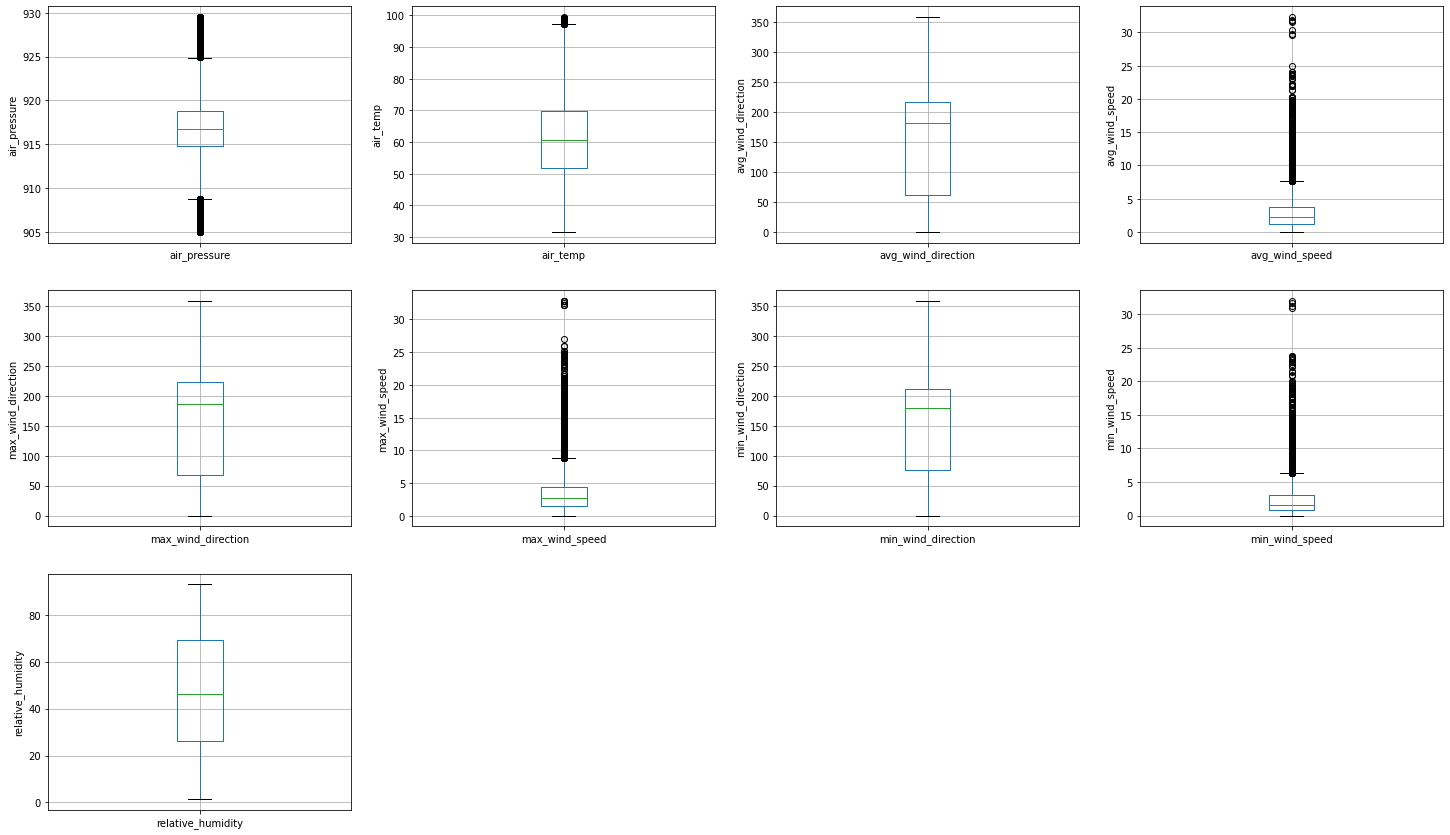

In [13]:
plt.figure(figsize=(25,20))
for i in range(len(columns)):
  plt.subplot(4, 4, i+1)
  fig = data.boxplot(column=columns[i])
  fig.set_title('')
  fig.set_ylabel(columns[i])

###### The above boxplots shows that there are some outliers in the dataset.

##### Removing outliers by Inter Quartile Range Method (IQR)


**Steps for IQR Method**
1. Find the first quartile, Q1.
2. Find the third quartile, Q3.
3. Calculate the IQR. IQR= Q3-Q1.
4. Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.
5. Any data point outside this range is considered as outlier and should be removed for further analysis.

In [14]:
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

pd.concat([Q1, Q3, IQR], axis=1, keys= ['Q1', 'Q3', 'IQR'])

,Q1,Q3,IQR
air_pressure,914.8,918.80,4.00
air_temp,51.8,69.98,18.18
avg_wind_direction,61.0,217.00,156.00
avg_wind_speed,1.2,3.80,2.60
max_wind_direction,67.0,223.00,156.00
max_wind_speed,1.6,4.50,2.90
min_wind_direction,76.0,212.00,136.00
min_wind_speed,0.8,3.00,2.20
relative_humidity,26.0,69.40,43.40


In [15]:
data = data[~((data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Again plotting Boxplots to check for the outliers.

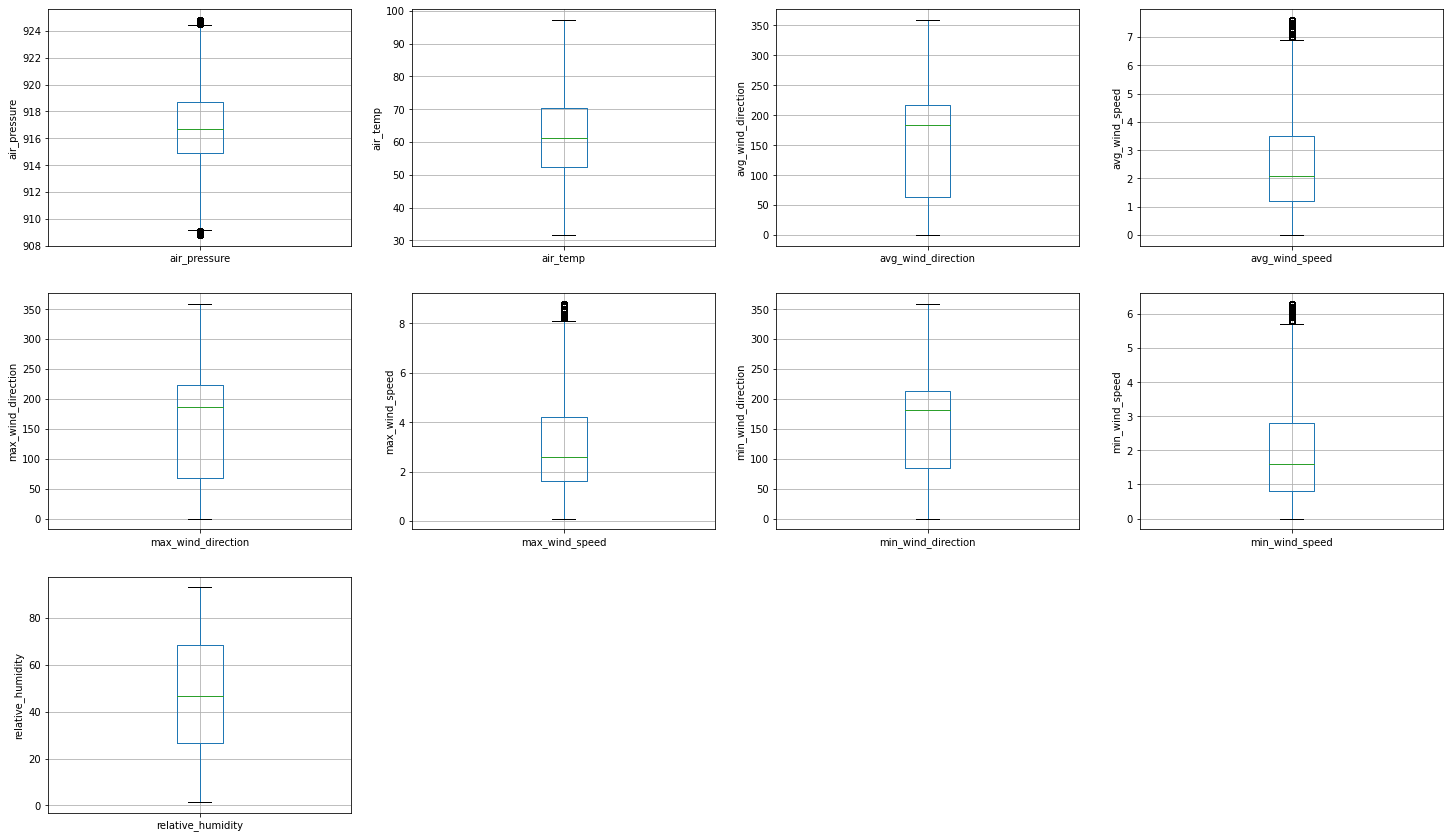

In [16]:
plt.figure(figsize=(25,20))
for i in range(len(columns)):
  plt.subplot(4, 4, i+1)
  fig = data.boxplot(column=columns[i])
  fig.set_title('')
  fig.set_ylabel(columns[i])

#### There are no outliers left in our model

In [17]:
data.shape

(997652, 9)

In [18]:
data

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,60.5
1,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,39.9
2,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,43.0
3,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,49.5
4,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,58.8
...,...,...,...,...,...,...,...,...,...
1048570,916.6,78.62,195.0,1.0,196.0,1.1,194.0,0.9,9.1
1048571,916.6,78.62,192.0,0.9,193.0,0.9,192.0,0.8,8.8
1048572,916.6,78.62,186.0,0.7,186.0,0.8,186.0,0.6,8.6
1048573,916.6,78.62,176.0,0.6,178.0,0.7,175.0,0.5,7.1


## Data Sampling

In [19]:
data1=data.sample(100000)

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 215502 to 121712
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   air_pressure        100000 non-null  float64
 1   air_temp            100000 non-null  float64
 2   avg_wind_direction  100000 non-null  float64
 3   avg_wind_speed      100000 non-null  float64
 4   max_wind_direction  100000 non-null  float64
 5   max_wind_speed      100000 non-null  float64
 6   min_wind_direction  100000 non-null  float64
 7   min_wind_speed      100000 non-null  float64
 8   relative_humidity   100000 non-null  float64
dtypes: float64(9)
memory usage: 7.6 MB


# Exploratory Data Analysis (EDA)

### Different histogram

array([[<AxesSubplot:title={'center':'air_pressure'}>,
        <AxesSubplot:title={'center':'air_temp'}>,
        <AxesSubplot:title={'center':'avg_wind_direction'}>],
       [<AxesSubplot:title={'center':'avg_wind_speed'}>,
        <AxesSubplot:title={'center':'max_wind_direction'}>,
        <AxesSubplot:title={'center':'max_wind_speed'}>],
       [<AxesSubplot:title={'center':'min_wind_direction'}>,
        <AxesSubplot:title={'center':'min_wind_speed'}>,
        <AxesSubplot:title={'center':'relative_humidity'}>]], dtype=object)

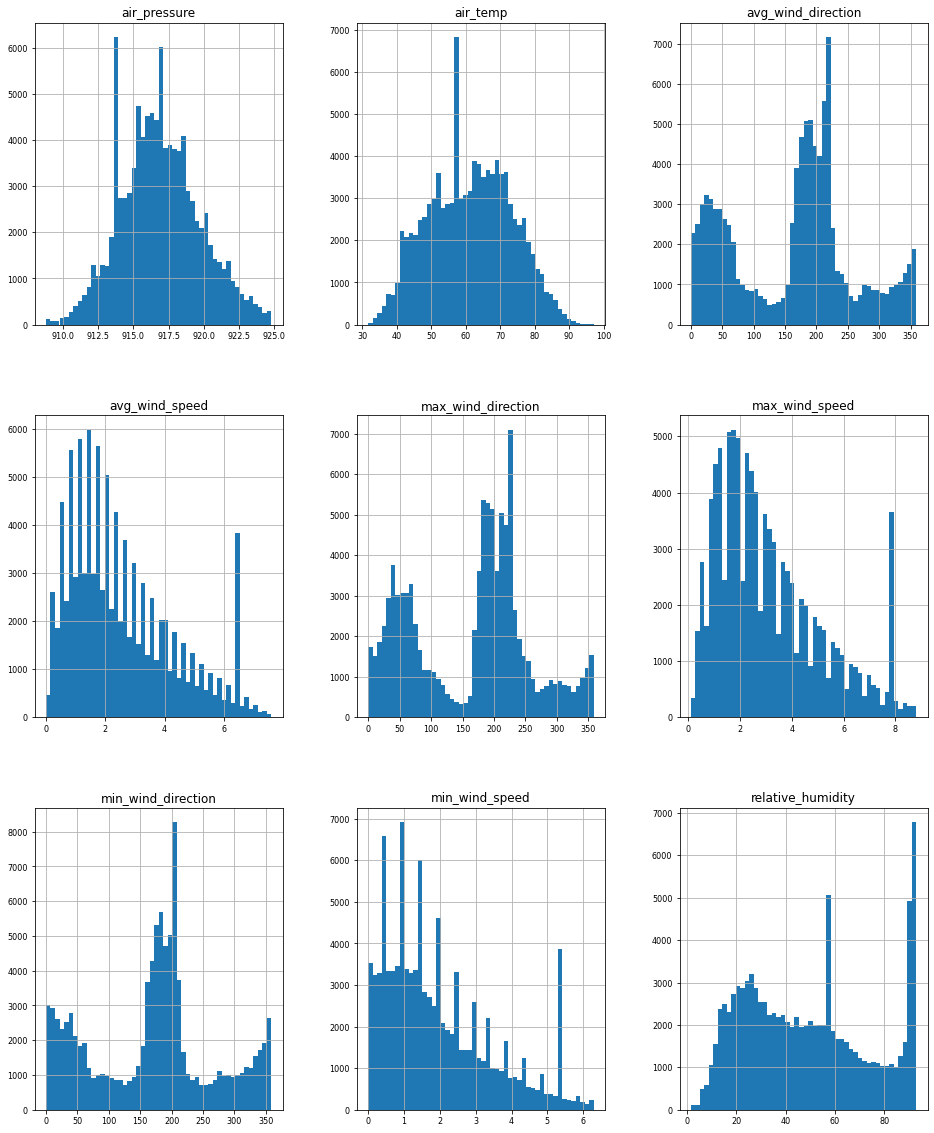

In [21]:
data1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Scatter Plot 

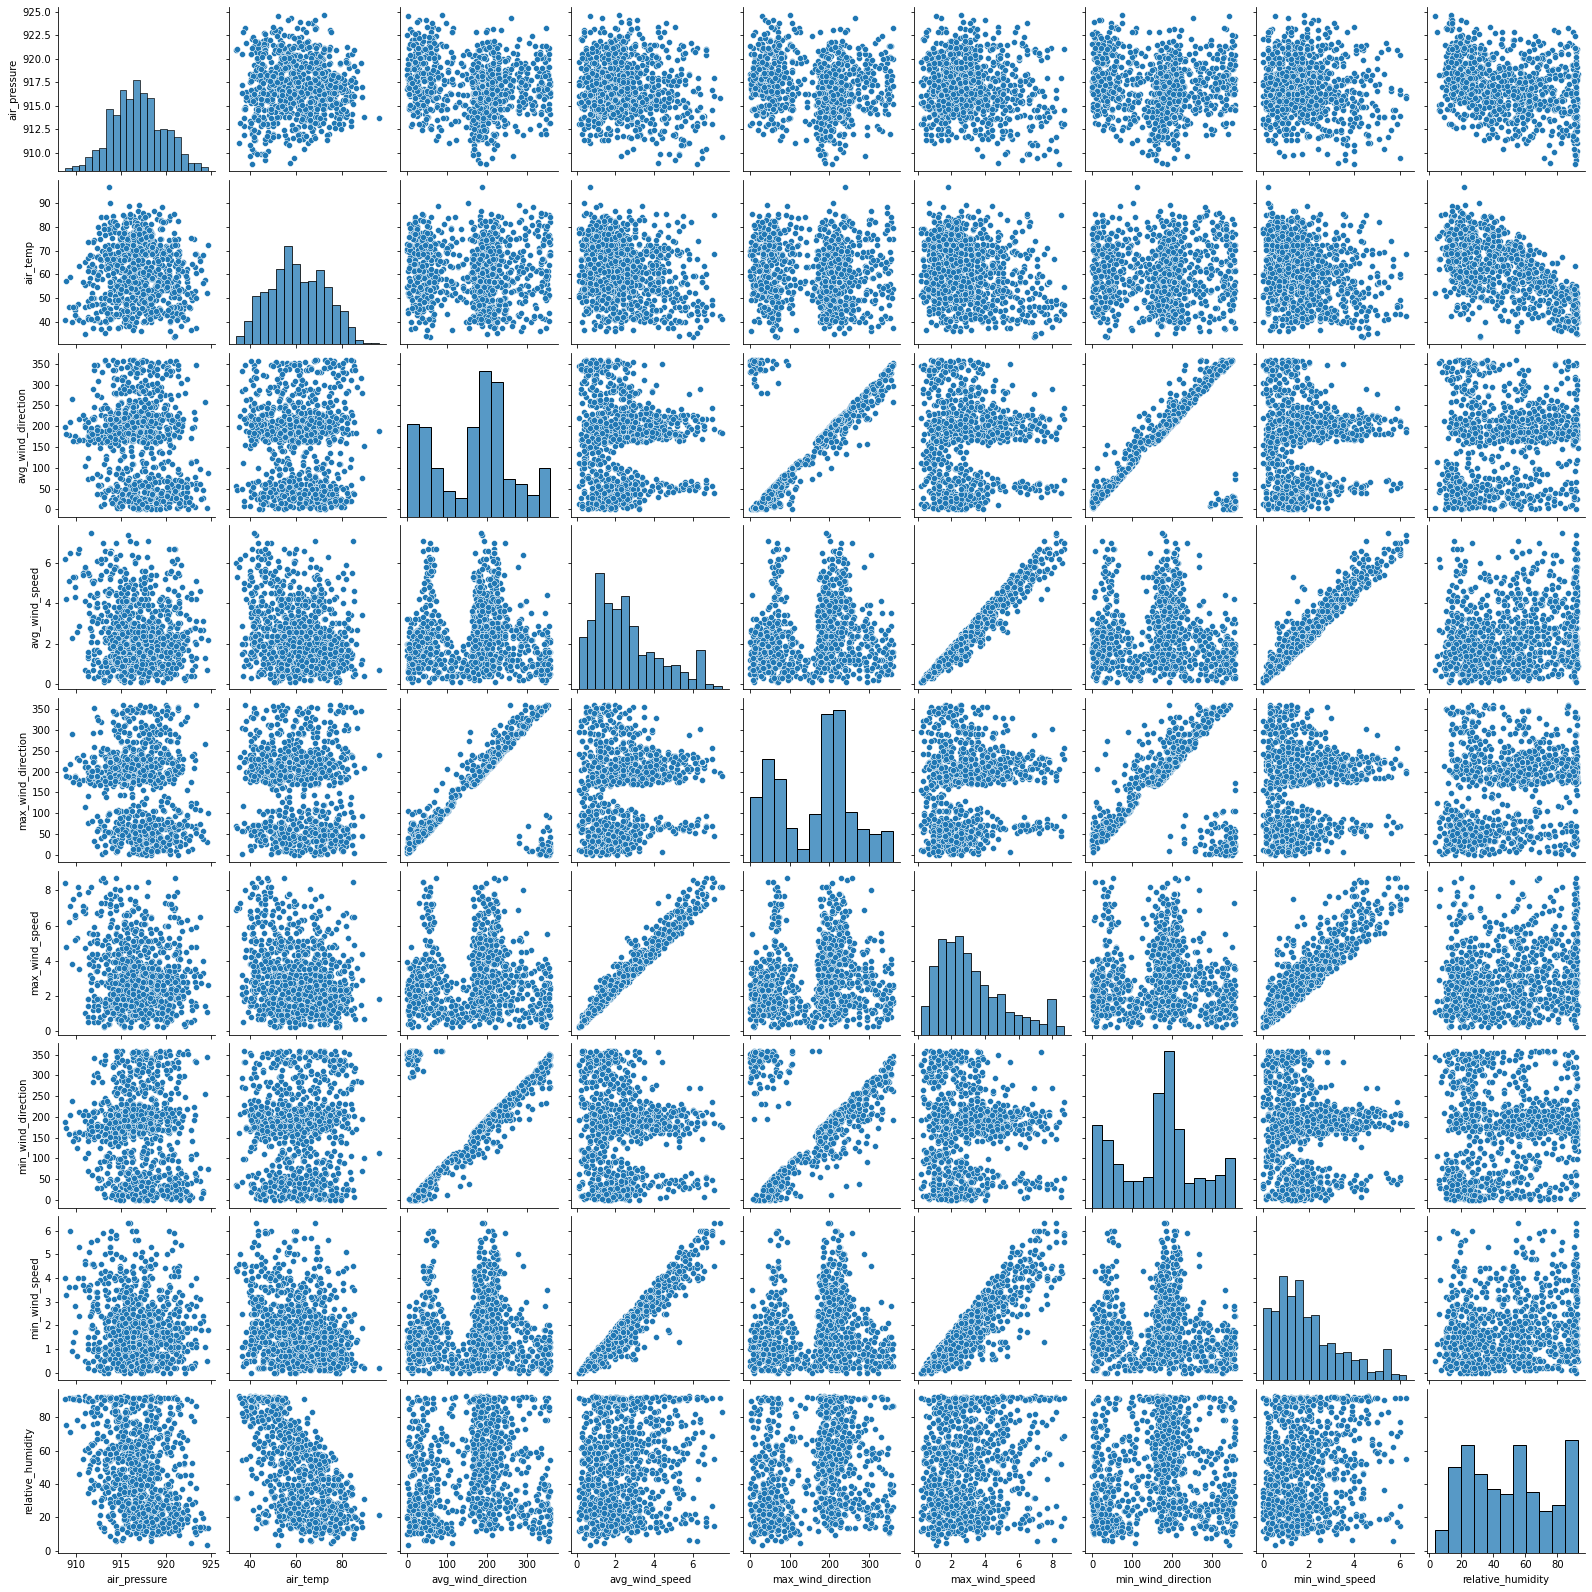

In [22]:
data3=data.sample(1000)
sns.pairplot(data3)
plt.show()

## Feature scaling by Standardizing Data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1[columns]=scaler.fit_transform(data1[columns])

#### Correlation Heatmap

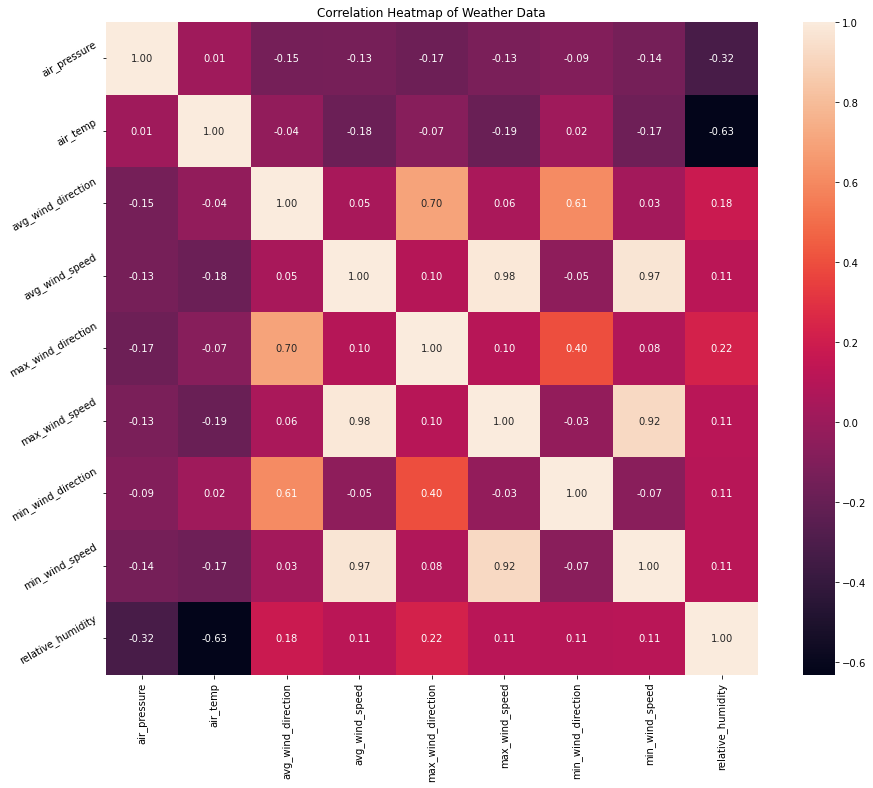

In [24]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Weather Data')
ax = sns.heatmap(data1[columns].corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

## Dimension Reduction with PCA
Principal component analysis (PCA) is a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize the variance.

In [25]:
data1.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'min_wind_direction',
       'min_wind_speed', 'relative_humidity'],
      dtype='object')

In [26]:
from sklearn.decomposition import PCA
pca=PCA().fit(data1)
pca_df=pca.transform(data1)

In [27]:
pca.explained_variance_ratio_

array([0.34468876, 0.25047255, 0.16497541, 0.10611585, 0.06545117,
       0.03153584, 0.02729477, 0.00903086, 0.00043478])

### Plot for PCA Captured Variance

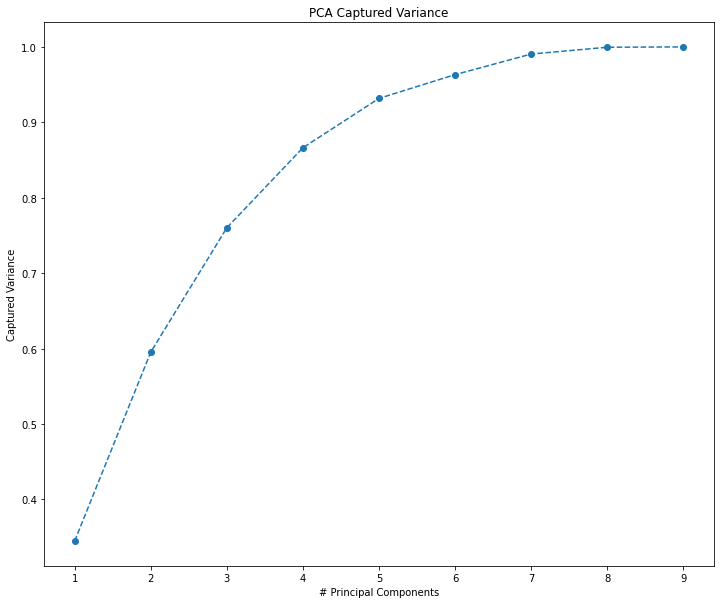

In [28]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', )
plt.title('PCA Captured Variance')
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()

As the first 5 components describe 96% variance of the dataset so we choose PCA with 5 components.

In [29]:
#so now we'll run PCA again with our chosen number of principal components:
pca = PCA(n_components=5)
pca.fit(data1)
pca.components_

array([[-0.15891294, -0.20612594,  0.13503875,  0.53728867,  0.16615382,
         0.52939801,  0.05129329,  0.52303301,  0.20317559],
       [ 0.18108172,  0.09223747, -0.55783307,  0.17895707, -0.50074135,
         0.16796232, -0.48500213,  0.18797174, -0.2568747 ],
       [-0.15039268, -0.63527164, -0.22642045, -0.13598044, -0.15891028,
        -0.1373762 , -0.23081657, -0.1283865 ,  0.62463669],
       [ 0.9066228 , -0.37539617,  0.11503336,  0.02969239,  0.05995113,
         0.04416068,  0.12479505,  0.0078965 , -0.0426385 ],
       [-0.07089594, -0.04900105, -0.10589536,  0.03154708, -0.63403315,
         0.04073837,  0.75815407,  0.02638844,  0.03481421]])

In [30]:
#now we make a new dataframe with these components
#and set the columns to the original columns of our data
data_pca = pd.DataFrame(data = pca.components_,
                           columns = data.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'])
data_pca

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
Component 1,-0.158913,-0.206126,0.135039,0.537289,0.166154,0.529398,0.051293,0.523033,0.203176
Component 2,0.181082,0.092237,-0.557833,0.178957,-0.500741,0.167962,-0.485002,0.187972,-0.256875
Component 3,-0.150393,-0.635272,-0.226420,-0.135980,-0.158910,-0.137376,-0.230817,-0.128386,0.624637
Component 4,0.906623,-0.375396,0.115033,0.029692,0.059951,0.044161,0.124795,0.007897,-0.042639
Component 5,-0.070896,-0.049001,-0.105895,0.031547,-0.634033,0.040738,0.758154,0.026388,0.034814


#### Scatter plot for PCA Comoponents

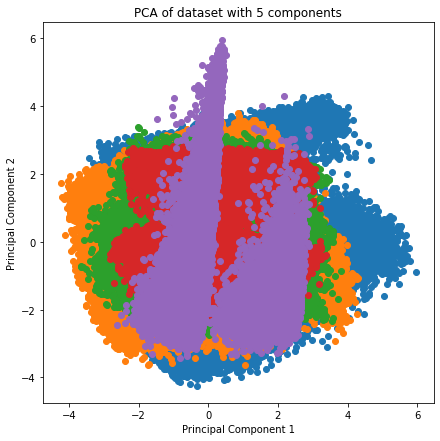

In [31]:
plt.figure(figsize=(7,7))
plt.xlabel("Principal Component 1",fontsize=10)
plt.ylabel("Principal Component 2",fontsize=10)
plt.title("PCA of dataset with 5 components")
plt.scatter(pca_df[:,0],pca_df[:,1])
plt.scatter(pca_df[:,1],pca_df[:,2])
plt.scatter(pca_df[:,2],pca_df[:,3])
plt.scatter(pca_df[:,3],pca_df[:,4])
plt.scatter(pca_df[:,4],pca_df[:,0])

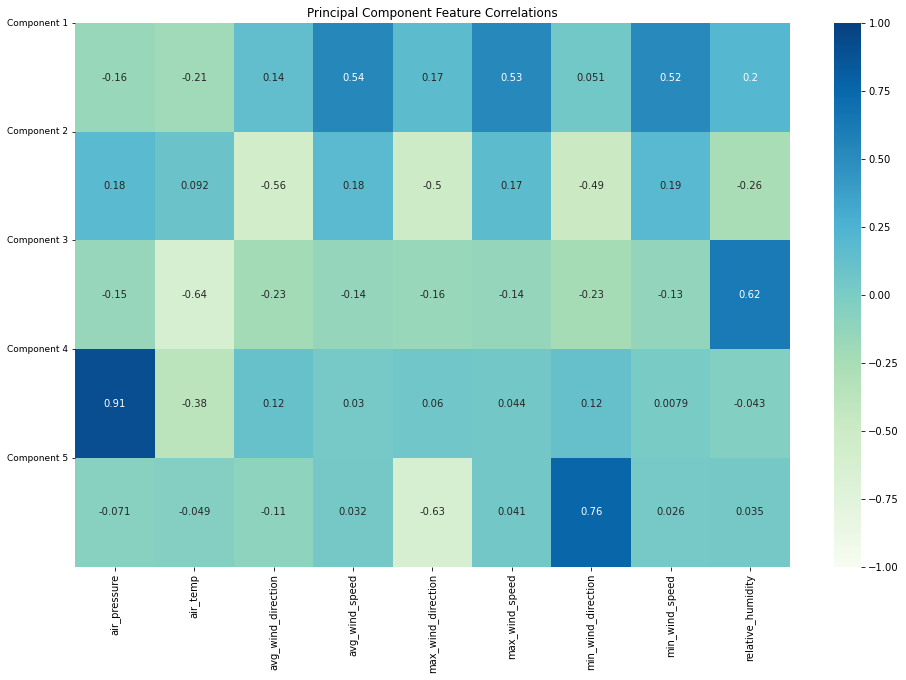

In [32]:
#We can make another heatmap to graph out the components:
plt.figure(figsize=(16,10))
sns.heatmap(data_pca, vmin=-1, vmax=1, cmap='GnBu', annot=True)
plt.title('Principal Component Feature Correlations')
plt.yticks([0, 1, 2, 3, 4], ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'],rotation=0, fontsize=9)
plt.show()

In [33]:
pca_scores = pca.transform(data1)
pca_scores

array([[-1.18009964,  1.11312419,  0.49540516, -0.69747586, -0.4937403 ],
       [-0.367439  ,  0.32785636, -1.87237344, -1.13018907, -0.30406513],
       [ 1.06060236, -0.60146007,  1.19681932,  0.68890301, -0.09043029],
       ...,
       [ 4.19117695,  0.10622497, -0.62461354, -0.53215799,  0.15008776],
       [ 0.60236326, -3.39381634,  0.8199808 ,  0.12410478, -0.51314144],
       [-1.01208927, -1.53389548,  0.26052306,  1.32411788, -1.20028317]])

In [34]:
data_pca1 = pd.DataFrame(data = pca_scores)
data_pca1

,0,1,2,3,4
0,-1.180100,1.113124,0.495405,-0.697476,-0.493740
1,-0.367439,0.327856,-1.872373,-1.130189,-0.304065
2,1.060602,-0.601460,1.196819,0.688903,-0.090430
3,1.915479,3.048878,-1.685119,-1.128789,-0.177523
4,4.191177,0.106225,-0.624614,-0.532158,0.150088
...,...,...,...,...,...
99995,-1.214056,2.257165,0.781956,0.655084,-0.178568
99996,3.149149,3.339447,-0.269501,-0.137879,-0.000948
99997,4.191177,0.106225,-0.624614,-0.532158,0.150088
99998,0.602363,-3.393816,0.819981,0.124105,-0.513141


In [35]:
pca_scores.shape

(100000, 5)

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

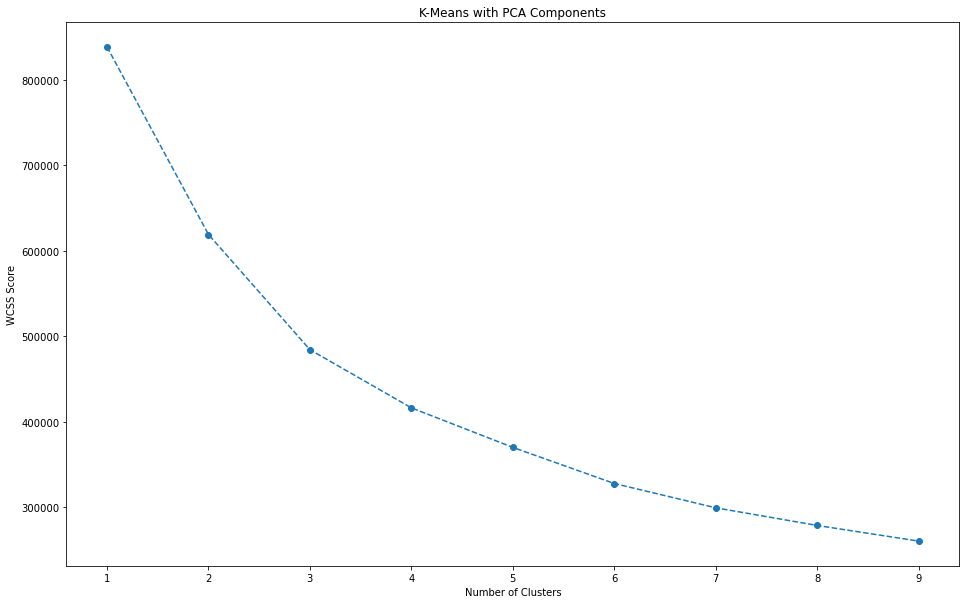

In [37]:
plt.figure(figsize=(16,10))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.title('K-Means with PCA Components')
plt.show()

In [38]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=3)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=3, random_state=3)

C:\Users\Shivam\AppData\Local\Temp/ipykernel_7248/3917602245.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  scalex=1.0/(xs.max()-xs.max())
C:\Users\Shivam\AppData\Local\Temp/ipykernel_7248/3917602245.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  scaley=1.0/(xs.min()-xs.min())


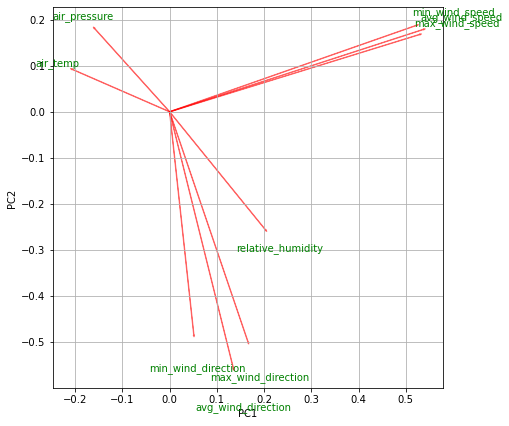

In [39]:
#Bi-Plot
plt.figure(figsize=(7,7))
def myplot(score,coeff,labels=None):
    xs=score[:,0]
    ys=score[:,1]
    n=coeff.shape[0]
    scalex=1.0/(xs.max()-xs.max())
    scaley=1.0/(xs.min()-xs.min())
    plt.scatter(xs*scalex,ys*scaley,s=5)
    for i in range(n):
        plt.arrow(0,0,coeff[i,0],coeff[i,1],color="r", alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,"Var"+str(i+1),color="green", ha="center", va="center")
        else:
            plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,labels[i],color="green", ha="center", va="center")
            
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
    plt.grid()
    
myplot(pca_df[:,0:3],np.transpose(pca.components_[0:2, :]),list(data1.columns))
plt.show()
          

### From the bi-plot above,the variables which seems closer to one another can be assumed to form a cluster.
## OBSERVATIONS:
1. avg_wind_direction, min_wind_direction, max_wind_direction and relative_humidity tend to form one of the clusters.

2. min_wind_speed, max_wind_speed, avg_wind_speed tend to form another cluster.

3. air_temp, air_pressure tend to form yet another cluster.

# K Means Clustering
It is an iterative algorithm that divides the unlabeled data set into k different clusters in such a way that each data set belongs only one group that has similar properties

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

# Elbow Method
The elbow method uses the sum of squared distance (SSE) to choose an ideal value of k based on the distance between the data points and their assigned clusters. We would choose a value of k where the SSE begins to flatten out and we see an inflection point. When visualized this graph would look somewhat like an elbow, hence the name of the method.

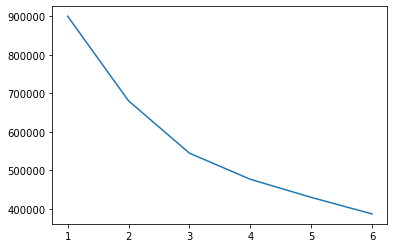

In [40]:
#k means
from sklearn.cluster import KMeans
SSE=[]
for i in range (1,7):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(pca_df)
    SSE.append(Kmeans.inertia_)
plt.plot(range (1,7),SSE)
plt.show()

As the graph become linear after the k value 3, so we take the value of k as 3.

In [41]:
Kmeans3=KMeans(n_clusters=3,init='k-means++',random_state=42).fit(pca_df)
y_kmeans3=Kmeans3.fit_predict(pca_df)

## Scatter Plot for K Means Clustering

In [42]:
from sklearn.metrics import silhouette_score

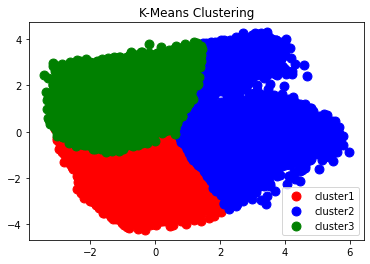

In [43]:
plt.scatter(pca_df[y_kmeans3==0,0],pca_df[y_kmeans3==0,1],s=80,c='red',label='cluster1')
plt.scatter(pca_df[y_kmeans3==1,0],pca_df[y_kmeans3==1,1],s=80,c='blue',label='cluster2')
plt.scatter(pca_df[y_kmeans3==2,0],pca_df[y_kmeans3==2,1],s=80,c='green',label='cluster3')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

### Silhoutte Score for K-Means Clustering

In [44]:
 print(f'Silhouette Score("n clusters=3"); {silhouette_score(pca_df,y_kmeans3)}')

Silhouette Score("n clusters=3"); 0.23928847444779844


# Agglomerative Hierarchical Clustering
Agglomerative Hierarchical Clustering (AHC) is a clustering (or classification) method which has the following advantages:

It works from the dissimilarities between the objects to be grouped together. A type of dissimilarity can be suited to the subject studied and the nature of the data.<br>
One of the results is the dendrogram which shows the progressive grouping of the data. It is then possible to gain an idea of a suitable number of classes into which the data can be grouped.

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing

In [46]:
clf = LocalOutlierFactor(n_neighbors=2)
data1['Outlier']=clf.fit_predict(data1)
data1=data1[data1['Outlier']==1]
data1.drop(['Outlier'], axis=1, inplace = True)
data1.reset_index(drop =True,inplace=True)

In [47]:
data2=data1.sample(10000)

### Forming a Dendogram
A dendrogram is a tree-like diagram that records the sequences of merges or splits.


In [48]:
hier_cluster = linkage(data2, method='ward')

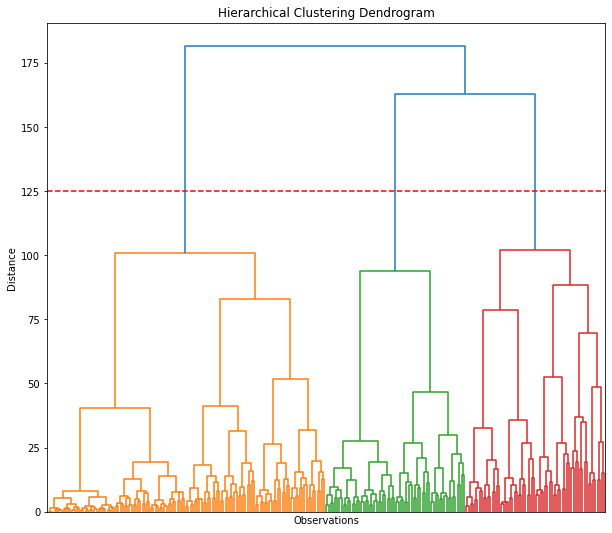

In [49]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster, truncate_mode='level', p = 7, show_leaf_counts=False, no_labels=True)
plt.axhline(y=125
            ,color='red',linestyle='--') 
plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.
<br> We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).

In [50]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data2)
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 0])

In [51]:
data2.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'min_wind_direction',
       'min_wind_speed', 'relative_humidity'],
      dtype='object')

## Agglomerative Hierarchical Clusters for different values of n

In [52]:
from sklearn.preprocessing import StandardScaler, normalize
data3=data.sample(10000)
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data3)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [53]:
data_pca2=data_pca1.sample(10000)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

### For 2 clusters

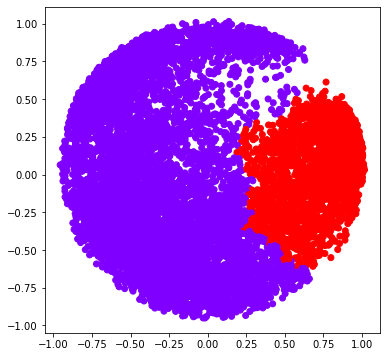

In [54]:

ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

### For 3 clusters

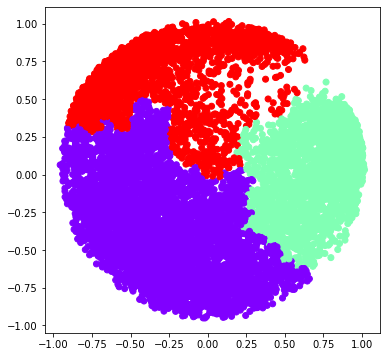

In [55]:

ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

### For 4 clusters

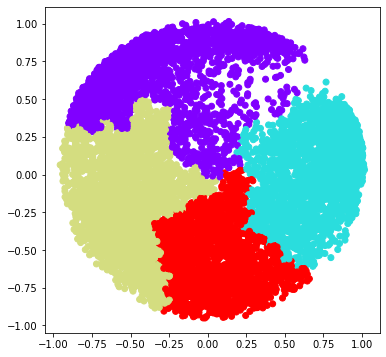

In [56]:
ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

### For 5 clusters

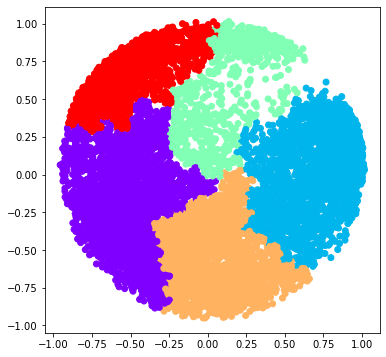

In [57]:
ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

### For 6 clusters

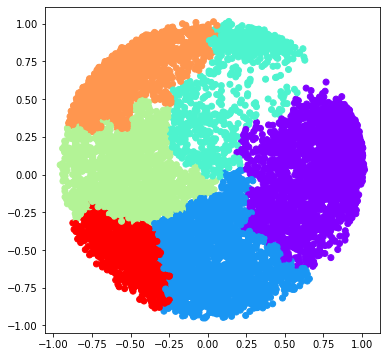

In [58]:
ac6 = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

### At last comparing the silhouette scores of the different clusters formed by Agglomerative Clustering

In [59]:
from sklearn.metrics import silhouette_score


In [60]:
k = [2, 3, 4, 5, 6]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))

In [61]:
silhouette_scores

[0.39247113129668343,
 0.4412222035866001,
 0.3987856746011082,
 0.3865714973842491,
 0.36942332722199556]

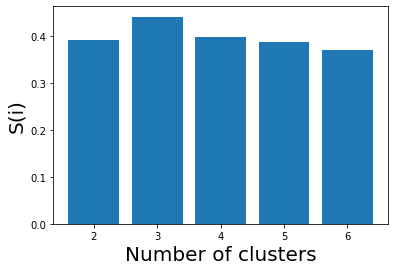

In [62]:
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

We see that the silhouette score for three number of clusters is maximum so we concluded that 3 clusters will be formed here. <br> Therefore, our visualization from dendogram tree of three clusters was correct.

In [63]:
from matplotlib import pyplot as plt

In [64]:
data1=pd.read_csv("Downloads/datamining.csv")
data1

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,10-09-2011 00:00,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,10-09-2011 00:01,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,10-09-2011 00:02,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,10-09-2011 00:03,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,10-09-2011 00:04,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,16-08-2013 04:48,916.6,78.62,195.0,1.0,196.0,1.1,194.0,0.9,0.0,0.0,9.1
1048571,1048571,16-08-2013 04:49,916.6,78.62,192.0,0.9,193.0,0.9,192.0,0.8,0.0,0.0,8.8
1048572,1048572,16-08-2013 04:50,916.6,78.62,186.0,0.7,186.0,0.8,186.0,0.6,0.0,0.0,8.6
1048573,1048573,16-08-2013 04:51,916.6,78.62,176.0,0.6,178.0,0.7,175.0,0.5,0.0,0.0,7.1


In [65]:
data1.drop(columns = 'rowID',inplace = True)
data1.drop(columns = 'hpwren_timestamp',inplace = True)
data1.drop(columns = 'rain_accumulation',inplace = True)
data1.drop(columns = 'rain_duration',inplace = True)
data1.shape

(1048575, 9)

In [66]:
columns=['air_pressure','air_temp','avg_wind_direction','avg_wind_speed','max_wind_direction','max_wind_speed','min_wind_direction','min_wind_speed','relative_humidity']

In [67]:
data1 = data1.dropna(axis = 0, how ='any')

In [68]:
#Findind the shape of our remaining dataset
data.shape

(997652, 9)

In [69]:
Q1 = data1[columns].quantile(0.25)
Q3 = data1[columns].quantile(0.75)
IQR = Q3 - Q1

pd.concat([Q1, Q3, IQR], axis=1, keys= ['Q1', 'Q3', 'IQR'])

,Q1,Q3,IQR
air_pressure,914.8,918.80,4.00
air_temp,51.8,69.98,18.18
avg_wind_direction,61.0,217.00,156.00
avg_wind_speed,1.2,3.80,2.60
max_wind_direction,67.0,223.00,156.00
max_wind_speed,1.6,4.50,2.90
min_wind_direction,76.0,212.00,136.00
min_wind_speed,0.8,3.00,2.20
relative_humidity,26.0,69.40,43.40


In [70]:
data = data[~((data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [71]:
data.shape

(997652, 9)

In [72]:
data1=data.sample(10000)

In [73]:
from sklearn.decomposition import PCA
pca=PCA().fit(data1)
pca_df=pca.transform(data1)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1[columns]=scaler.fit_transform(data1[columns])

In [75]:
#so now we'll run PCA again with our chosen number of principal components:
pca = PCA(n_components=5)
pca.fit(data1)
pca.components_

array([[-0.14544281, -0.21116915,  0.10941662,  0.54419886,  0.14301441,
         0.535886  ,  0.02960284,  0.52949142,  0.19304187],
       [-0.20039272, -0.08359702,  0.56012524, -0.15325717,  0.50962326,
        -0.14243624,  0.48701481, -0.16469672,  0.26704658],
       [-0.13456682, -0.638009  , -0.23300266, -0.13986176, -0.1396208 ,
        -0.14259287, -0.22521306, -0.13335163,  0.62662147],
       [ 0.90432516, -0.36879507,  0.12724505,  0.02492846,  0.06445246,
         0.04067951,  0.1442183 ,  0.00192504, -0.05255385],
       [-0.08067797, -0.05050215, -0.09803251,  0.02945989, -0.6432469 ,
         0.03631966,  0.75024927,  0.02747115,  0.04180931]])

In [76]:
pca_scores = pca.transform(data1)
pca_scores

array([[ 1.54699337,  0.09456672, -1.10909249, -0.27392045, -0.05158922],
       [-2.42024362,  0.36262124, -1.57566995,  1.1124652 ,  0.76498941],
       [-1.86045964,  1.89606744, -2.55881784,  1.17601618, -0.68318303],
       ...,
       [ 0.54496539, -2.77373695, -0.52841816,  1.24036254, -0.18721489],
       [-0.1249494 ,  0.54069886, -1.46412225, -0.19048143, -0.37203531],
       [-0.64754913, -2.49216072,  0.27391666,  0.03748026, -0.15510348]])

In [77]:
data_pca1 = pd.DataFrame(data = pca_scores)
data_pca1

,0,1,2,3,4
0,1.546993,0.094567,-1.109092,-0.273920,-0.051589
1,-2.420244,0.362621,-1.575670,1.112465,0.764989
2,-1.860460,1.896067,-2.558818,1.176016,-0.683183
3,1.269301,-2.125259,0.138682,-0.610157,0.035754
4,4.197691,0.081291,-0.664794,-0.560676,0.149367
...,...,...,...,...,...
9995,2.427961,-0.124339,0.306685,0.254928,0.047509
9996,2.641947,0.606407,1.674466,0.331681,0.098672
9997,0.544965,-2.773737,-0.528418,1.240363,-0.187215
9998,-0.124949,0.540699,-1.464122,-0.190481,-0.372035


In [78]:
data_pca_ac3 = pd.concat([data1.reset_index(drop=True), pd.DataFrame(data_pca1)], axis=1)
data_pca_ac3.columns.values[-5:] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']

data_pca_ac3['Agglomerative Clustering PCA Segment'] = ac3.labels_
data_pca_ac3

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity,Component 1,Component 2,Component 3,Component 4,Component 5,Agglomerative Clustering PCA Segment
0,-0.134415,0.869579,0.393922,0.920044,0.437721,0.699040,0.278843,1.334371,0.079179,1.546993,0.094567,-1.109092,-0.273920,-0.051589,0
1,1.292229,0.794109,1.818165,-1.124381,-1.331130,-0.954580,0.532881,-1.243665,-1.590359,-2.420244,0.362621,-1.575670,1.112465,0.764989,1
2,1.434893,1.624273,1.436302,-0.949144,1.716409,-0.904470,1.203540,-0.904450,-1.382647,-1.860460,1.896067,-2.558818,1.176016,-0.683183,1
3,-0.705072,-0.730374,-1.009680,0.920044,-0.990146,0.749150,-1.113283,1.130842,-1.053442,1.269301,-2.125259,0.138682,-0.610157,0.035754,1
4,-1.097399,-0.353026,0.548731,2.321935,0.629524,2.352660,0.360135,2.284173,0.357435,4.197691,0.081291,-0.664794,-0.560676,0.149367,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.384077,-1.288848,0.166869,1.328928,0.277885,1.250247,0.034967,1.198685,0.067422,2.427961,-0.124339,0.306685,0.254928,0.047509,0
9996,-0.455410,-1.847321,0.290716,1.153692,0.405754,0.949589,0.116259,1.198685,1.662497,2.641947,0.606407,1.674466,0.331681,0.098672,1
9997,1.506226,-0.368120,-1.102565,0.803219,-1.075392,0.648931,-1.194575,0.927313,-1.449272,0.544965,-2.773737,-0.528418,1.240363,-0.187215,0
9998,0.186580,1.458240,0.507448,0.043862,0.725426,0.097724,0.319489,0.045353,-0.304893,-0.124949,0.540699,-1.464122,-0.190481,-0.372035,2


In [79]:
data_pca_ac3_freq = data_pca_ac3.groupby(['Agglomerative Clustering PCA Segment']).mean()
data_pca_ac3_freq

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity,Component 1,Component 2,Component 3,Component 4,Component 5
Agglomerative Clustering PCA Segment,,,,,,,,,,,,,,
0,0.007481,0.013865,-0.004214,0.009692,-0.004257,0.011050,0.004434,0.010276,-0.007107,0.010311,-0.011678,-0.018030,0.002565,0.005847
1,0.012073,-0.028436,-0.027525,-0.011355,-0.013876,-0.013754,-0.021324,-0.009390,0.008654,-0.018230,-0.025360,0.039895,0.012617,-0.004643
2,-0.028841,0.004122,0.039729,-0.006775,0.024351,-0.006810,0.015176,-0.010186,0.004597,-0.000239,0.052402,-0.008666,-0.019495,-0.006588


In [80]:
data_pca_ac3_freq['Obs.'] = data_pca_ac3[['Agglomerative Clustering PCA Segment', 'air_temp']].groupby(['Agglomerative Clustering PCA Segment']).count()
data_pca_ac3_freq['Obs. Prop.'] = data_pca_ac3_freq['Obs.'] / data_pca_ac3_freq['Obs.'].sum()
data_pca_ac3_freq = data_pca_ac3_freq.rename({0:'Cool', 1:'Warm', 2:'Dry'})
data_pca_ac3_freq

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity,Component 1,Component 2,Component 3,Component 4,Component 5,Obs.,Obs. Prop.
Agglomerative Clustering PCA Segment,,,,,,,,,,,,,,,,
Cool,0.007481,0.013865,-0.004214,0.009692,-0.004257,0.011050,0.004434,0.010276,-0.007107,0.010311,-0.011678,-0.018030,0.002565,0.005847,4872,0.4872
Warm,0.012073,-0.028436,-0.027525,-0.011355,-0.013876,-0.013754,-0.021324,-0.009390,0.008654,-0.018230,-0.025360,0.039895,0.012617,-0.004643,2724,0.2724
Dry,-0.028841,0.004122,0.039729,-0.006775,0.024351,-0.006810,0.015176,-0.010186,0.004597,-0.000239,0.052402,-0.008666,-0.019495,-0.006588,2404,0.2404


### Pie chart showing percentage of cool, warm and dry days

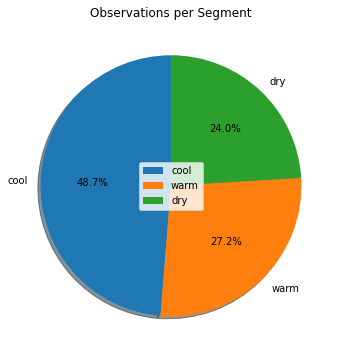

In [84]:
label="cool","warm","dry"
data_pca_ac3_freq.plot.pie(y='Obs.', figsize=(6, 6),labels=label,autopct='%1.1f%%',shadow=True, startangle=90)
plt.legend(loc='center')
plt.ylabel(None, loc='center')
plt.title('Observations per Segment')
plt.show()